<a href="https://colab.research.google.com/github/prajeet26/data-Visualization/blob/main/The_Next_Bechdel_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import matplotlib.pyplot as plt and pandas as pd.

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

Use Pandas `pd.read_csv()` to load the dataset **bechdelExpanded.csv** into a DataFrame and save the results to a variable. You can name the variable anything you like. `df` is often used as the variable name for a DataFrame.

In [7]:
df = pd.read_csv("/content/drive/MyDrive/nextBechdel_allTests.csv")

Inspect the DataFrame using `.head()`

The first column in the dataset is the name of a movie. Each column that follows represents one of the tests being applied to each movie. Each row represents whether that movie passed, or failed each test. A `1` represents a passing score, and a `0` represents a failing score.

In [8]:
df.head()

,movie,bechdel,peirce,landau,feldman,villareal,hagen,ko,villarobos,waithe,koeze_dottle,uphold,white,rees-davies
0,Bad Moms,0,0,0,1,0,0,0,1,0,0,1,1,1
1,Hidden Figures,0,0,0,0,0,1,0,1,0,1,1,1,1
2,Independence Day: Resurgence,0,0,1,0,0,1,0,1,0,0,1,1,1
3,Finding Dory,0,0,1,0,0,0,1,1,1,1,1,1,0
4,Ghostbusters,0,0,0,0,0,1,0,1,1,1,1,1,1


Call `.info()` on your DataFrame and print the result. This will display a summary of the basic information about your DataFrame and its data.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie         50 non-null     object
 1   bechdel       50 non-null     int64 
 2   peirce        50 non-null     int64 
 3   landau        50 non-null     int64 
 4   feldman       50 non-null     int64 
 5   villareal     50 non-null     int64 
 6   hagen         50 non-null     int64 
 7   ko            50 non-null     int64 
 8   villarobos    50 non-null     int64 
 9   waithe        50 non-null     int64 
 10  koeze_dottle  50 non-null     int64 
 11  uphold        50 non-null     int64 
 12  white         50 non-null     int64 
 13  rees-davies   50 non-null     int64 
dtypes: int64(13), object(1)
memory usage: 5.6+ KB


In [10]:
df["total_score"] = df['bechdel'] + df['waithe'] + df['ko']

Check your DataFrame again with `.head()` to see the new column.

In [11]:
df.head()

,movie,bechdel,peirce,landau,feldman,villareal,hagen,ko,villarobos,waithe,koeze_dottle,uphold,white,rees-davies,total_score
0,Bad Moms,0,0,0,1,0,0,0,1,0,0,1,1,1,0
1,Hidden Figures,0,0,0,0,0,1,0,1,0,1,1,1,1,0
2,Independence Day: Resurgence,0,0,1,0,0,1,0,1,0,0,1,1,1,0
3,Finding Dory,0,0,1,0,0,0,1,1,1,1,1,1,0,2
4,Ghostbusters,0,0,0,0,0,1,0,1,1,1,1,1,1,1


It will be easier to visualize our data if it is organized by each movie's total score.  

Using Pandas `.sort_values()`, create a new DataFrame called `df_sorted` that is a copy of your current DataFrame, sorted by `total_score`. Make sure to reset the index of the new DataFrame using `.reset_index(drop = True)`.

Hint: The syntax for sorting by a column in Pandas is:
`df.sort_values("column_name").reset_index(drop = True)`

In [12]:
df_sorted = df.sort_values('total_score').reset_index(drop = True)

Use .head() to check your new `df_sorted` DataFrame.

In [13]:
df_sorted.head()

,movie,bechdel,peirce,landau,feldman,villareal,hagen,ko,villarobos,waithe,koeze_dottle,uphold,white,rees-davies,total_score
0,Bad Moms,0,0,0,1,0,0,0,1,0,0,1,1,1,0
1,Hidden Figures,0,0,0,0,0,1,0,1,0,1,1,1,1,0
2,Independence Day: Resurgence,0,0,1,0,0,1,0,1,0,0,1,1,1,0
3,Boo! A Madea Halloween,0,0,1,1,1,1,0,1,0,0,1,1,1,0
4,Moana,0,0,1,1,1,1,0,1,1,1,1,1,1,1


In [14]:
df_partial = df_sorted[['movie', 'bechdel', 'waithe', 'ko', 'total_score']]

Use .head() to check the new DataFrame.

In [15]:
df_partial.head()

,movie,bechdel,waithe,ko,total_score
0,Bad Moms,0,0,0,0
1,Hidden Figures,0,0,0,0
2,Independence Day: Resurgence,0,0,0,0
3,Boo! A Madea Halloween,0,0,0,0
4,Moana,0,1,0,1


In [16]:
ax = df_partial[["movie", "total_score"]].set_index('movie')

<Axes: title={'center': 'Representation In Movies'}, xlabel='movie'>

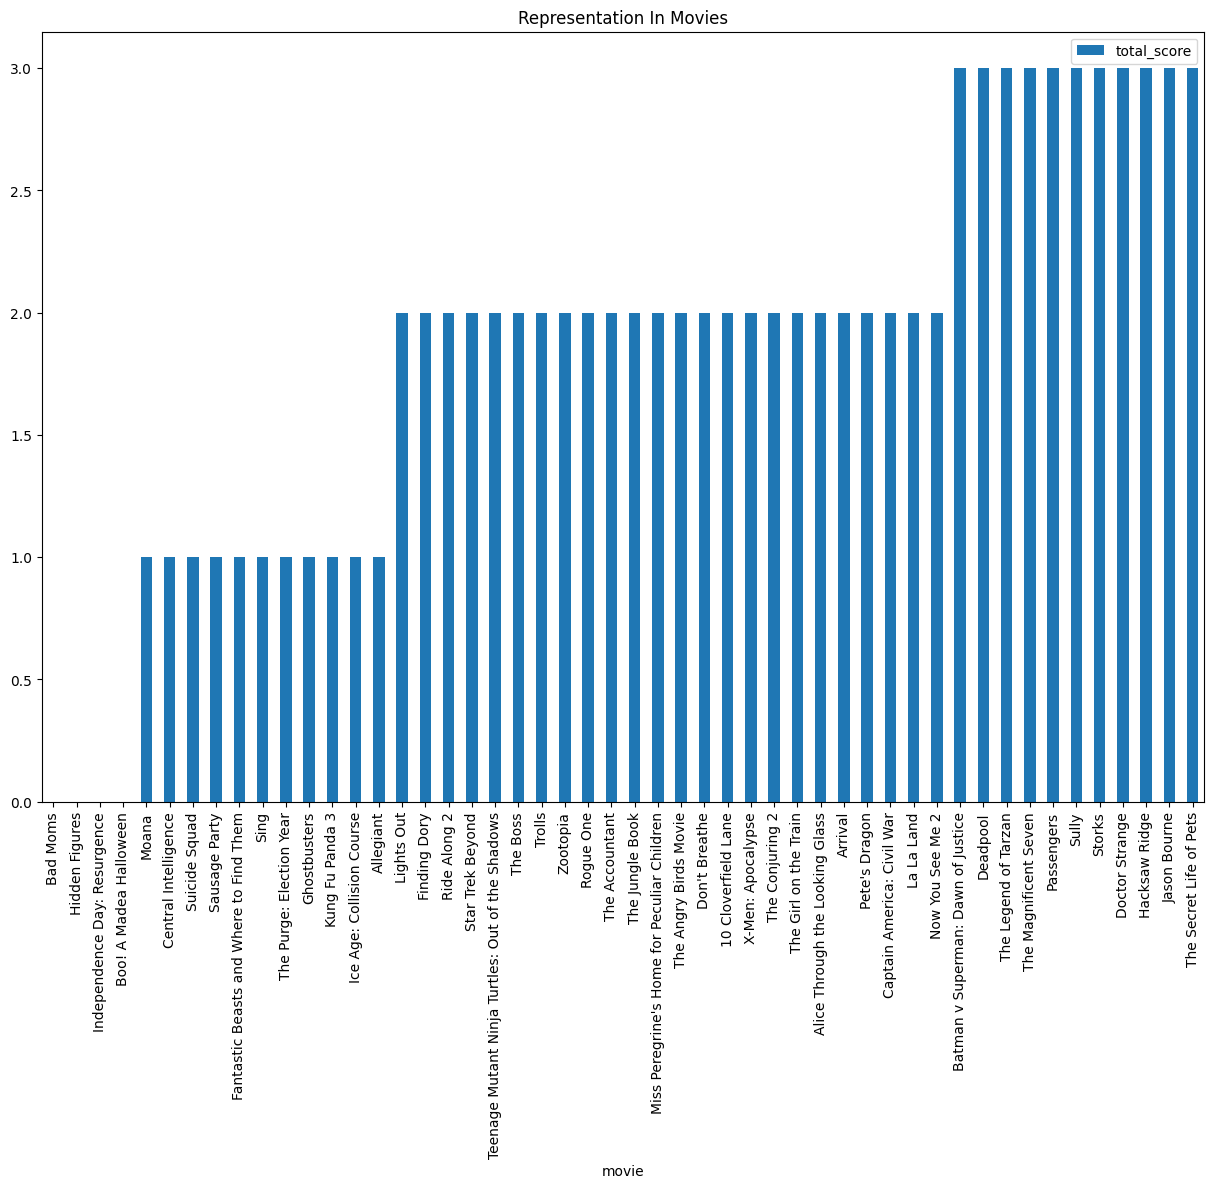

In [17]:
ax.plot(kind='bar', title="Representation In Movies", figsize=(15,10), legend=True)

There are many aspects of a Matplotlib plot that can be customized to make it easier to visualize data. Try a few of them below:

Set the `kind` argument of `.plot()` to `barh` to make the plot a horizontal bar chart.

Add the following argument to `.plot()` so it is easier to see the names of each movie: `fontsize=12`.

Make the visualization taller, and even the spread by changing the figsize argument to `figsize=(15, 15)`.

<Axes: title={'center': 'Representation In Movies'}, ylabel='movie'>

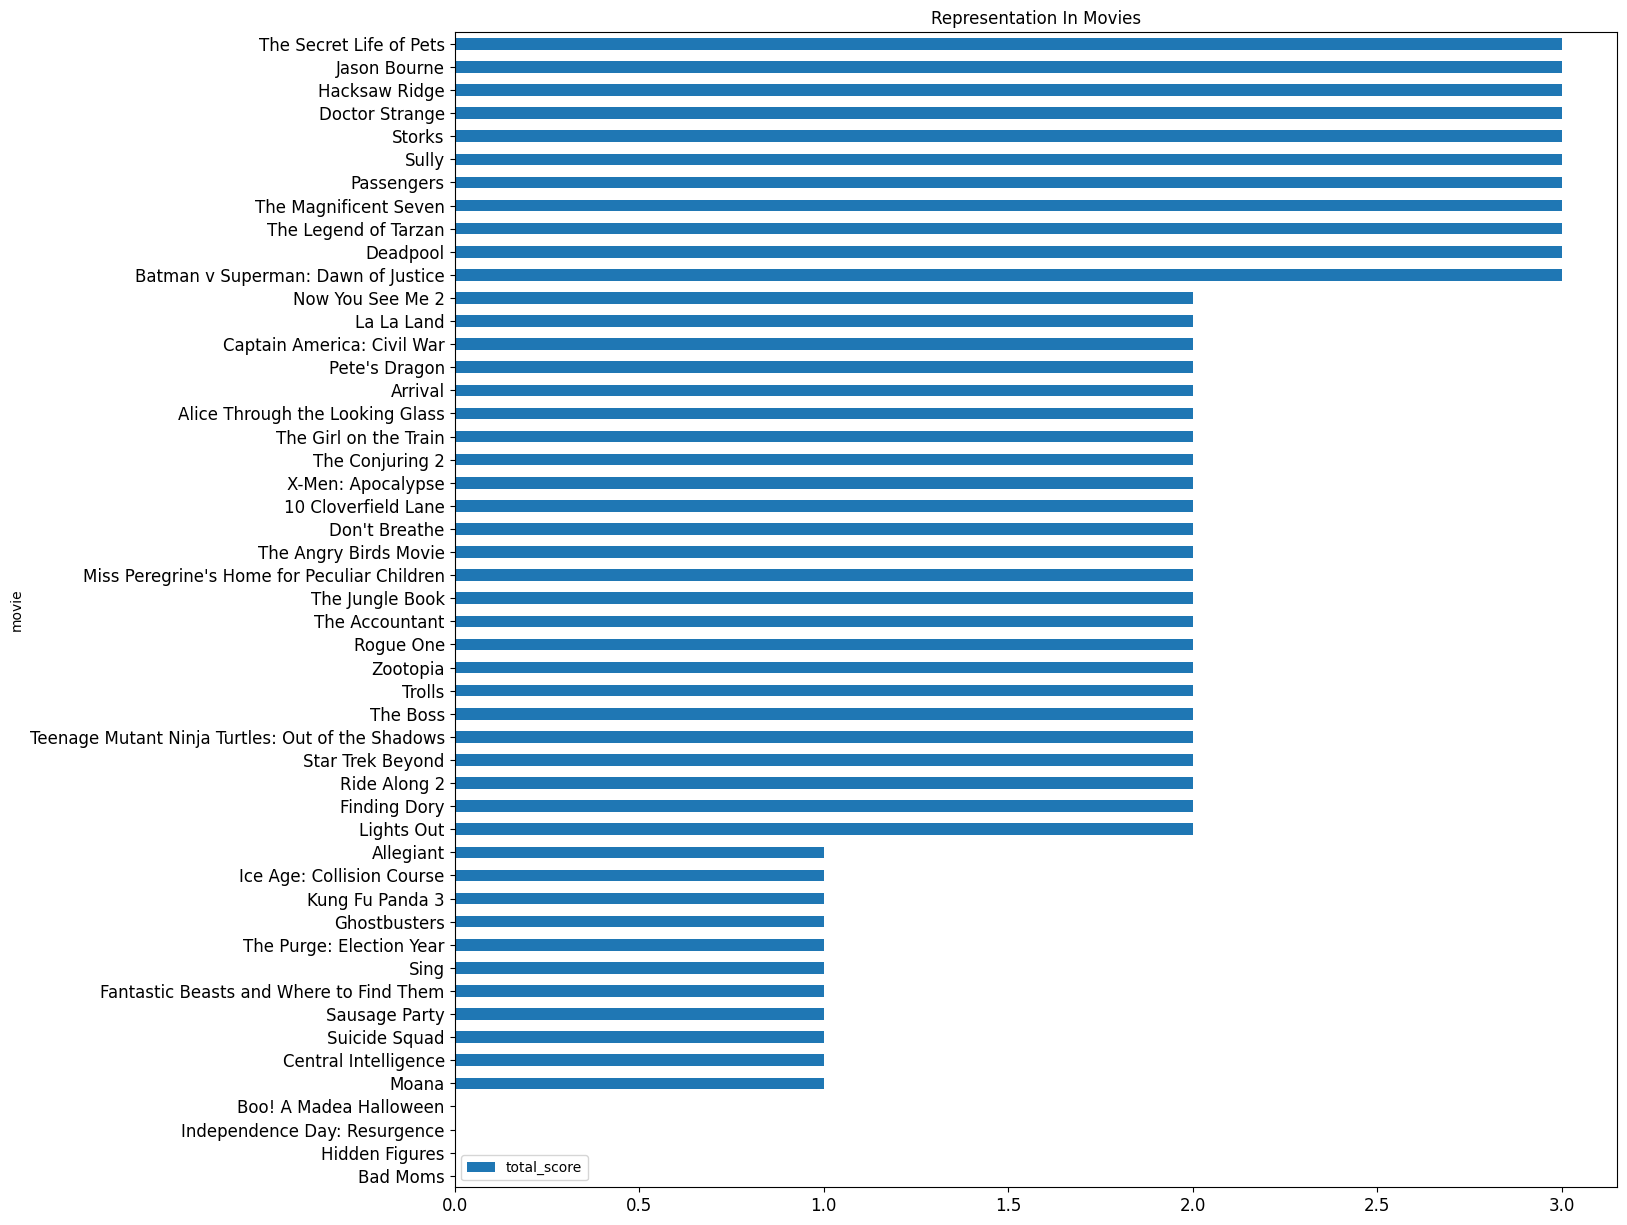

In [18]:
ax.plot(kind='barh', title ='Representation In Movies', figsize=(15, 15), legend=True, fontsize=12)

In [20]:
df["Cumulative Total Score"] = df["bechdel"] + df["peirce"] + df["landau"] + df["feldman"] + df["villareal"] + df["hagen"] + df["ko"] + df["villarobos"] + df["waithe"] + df["koeze_dottle"] + df["uphold"] + df["white"] + df["rees-davies"]

df_sorted = df.sort_values('Cumulative Total Score').reset_index(drop = True)

df_sorted.head()

,movie,bechdel,peirce,landau,feldman,villareal,hagen,ko,villarobos,waithe,koeze_dottle,uphold,white,rees-davies,total_score,Cumulative Total Score
0,Bad Moms,0,0,0,1,0,0,0,1,0,0,1,1,1,0,5
1,Hidden Figures,0,0,0,0,0,1,0,1,0,1,1,1,1,0,6
2,Independence Day: Resurgence,0,0,1,0,0,1,0,1,0,0,1,1,1,0,6
3,Finding Dory,0,0,1,0,0,0,1,1,1,1,1,1,0,2,7
4,Ghostbusters,0,0,0,0,0,1,0,1,1,1,1,1,1,1,7


In [21]:
ax = df_sorted[["movie", "Cumulative Total Score"]].set_index('movie')

<Axes: title={'center': 'Representation In Movies'}, xlabel='movie'>

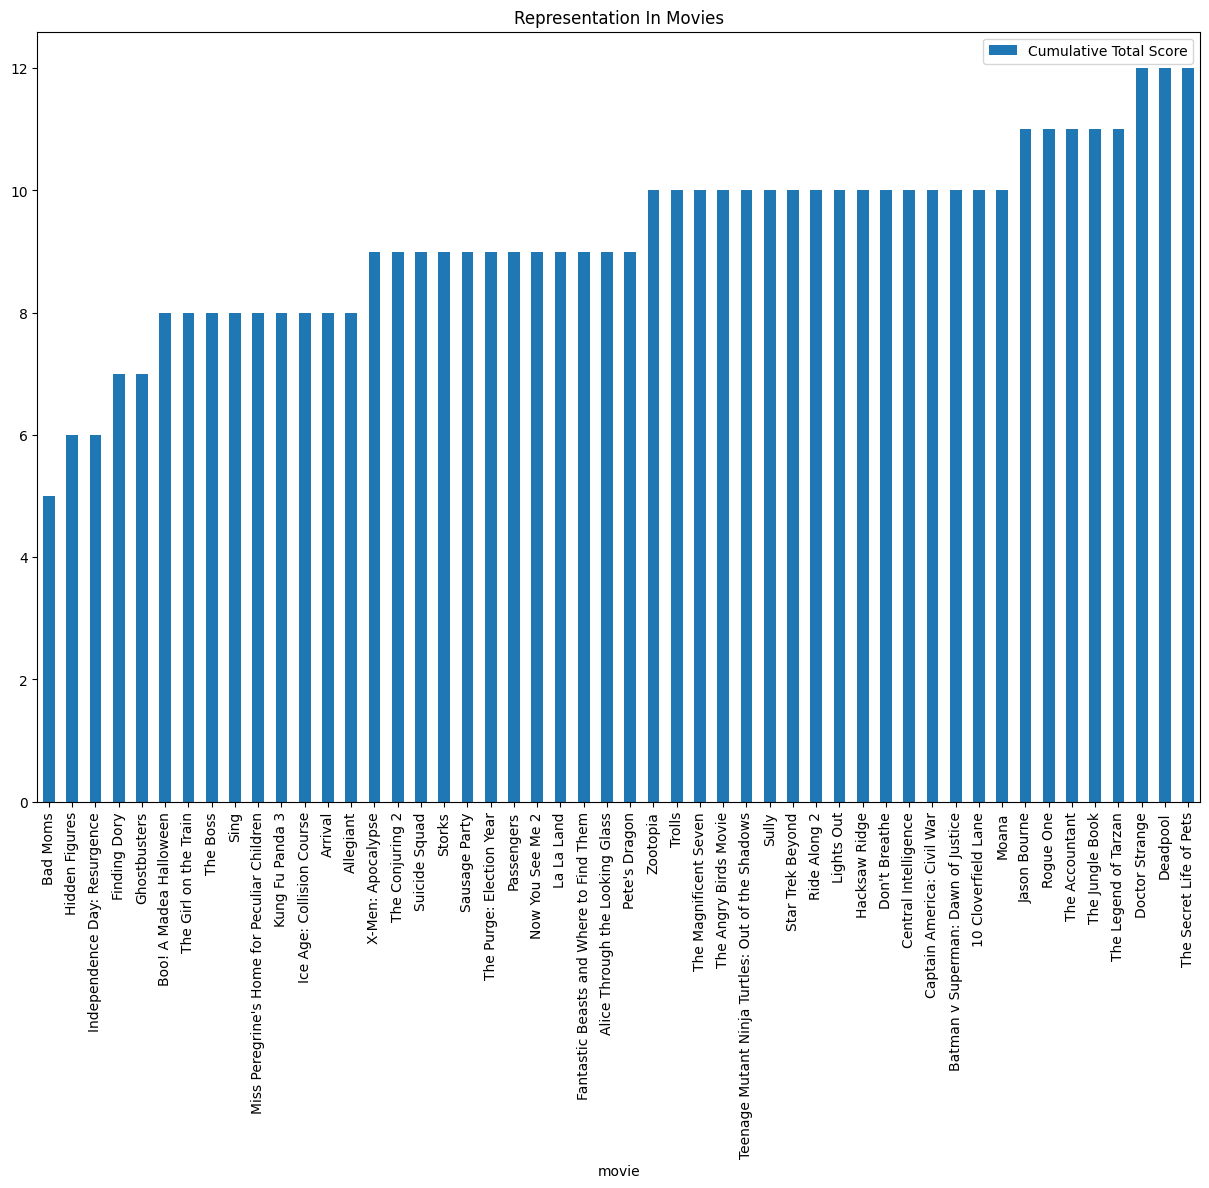

In [22]:
ax.plot(kind='bar', title="Representation In Movies", figsize=(15,10), legend=True)

---